In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [54]:
from tensorflow.data import AUTOTUNE
import tensorflow as tf
import matplotlib.pyplot as plt

In [55]:
print(tf.__version__)

2.6.4


In [74]:
Batch_SIZE = 128
NUM_STEPS = 64
img_height = 180
img_width = 180
data_dir = "/kaggle/input/mosquito-on-human-skin/zw4p9kj6nt-2/"

In [75]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "../input/mosquito-on-human-skin/zw4p9kj6nt-2/data_splitting/Train/",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=Batch_SIZE)

Found 4200 files belonging to 6 classes.


In [76]:
val_ds = tf.keras.utils.image_dataset_from_directory(
 "../input/mosquito-on-human-skin/zw4p9kj6nt-2/data_splitting/Test/",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=Batch_SIZE)

Found 1799 files belonging to 6 classes.


In [77]:
class_names = train_ds.class_names
print(class_names)

['Culex landing', 'Culex smashed', 'aegypti landing', 'aegypti smashed', 'albopictus landing', 'albopictus smashed']


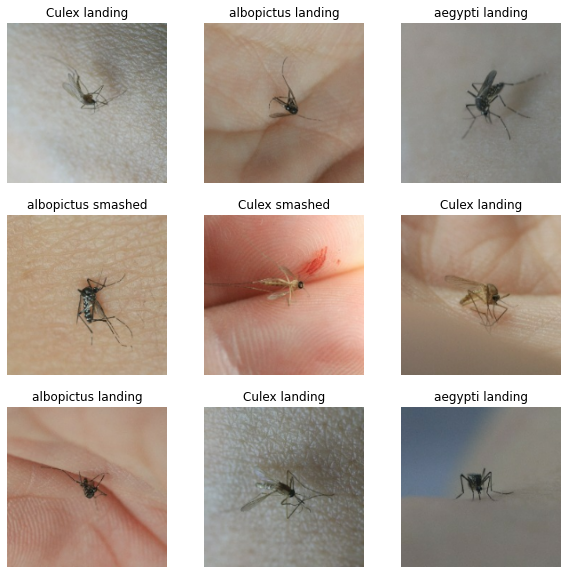

In [78]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [79]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 180, 180, 3)
(128,)


In [80]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [81]:
num_classes = len(class_names)
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(32, (3,3),1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3, momentum = 0.99, epsilon=0.001),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(64, (3,3),1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3, momentum = 0.99, epsilon=0.001),
    tf.keras.layers.MaxPool2D((2,2)),
    
    #tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [82]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [83]:
checkpoint_path = "/kaggle/working/mymodel/training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath= checkpoint_path,
        verbose=1,
        save_weights_only=True
    )
]
model.save_weights(checkpoint_path.format(epoch=0))

In [84]:
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=10,
  callbacks=callbacks
)

Epoch 1/10
33/33 [==============================] - 81s 2s/step - loss: 1.6080 - accuracy: 0.3329 - val_loss: 1.7831 - val_accuracy: 0.1645

Epoch 00001: saving model to /kaggle/working/mymodel/training_2/cp-0001.ckpt
Epoch 2/10
33/33 [==============================] - 75s 2s/step - loss: 1.5103 - accuracy: 0.4195 - val_loss: 1.7803 - val_accuracy: 0.2079

Epoch 00002: saving model to /kaggle/working/mymodel/training_2/cp-0002.ckpt
Epoch 3/10
33/33 [==============================] - 75s 2s/step - loss: 1.4248 - accuracy: 0.4769 - val_loss: 1.8073 - val_accuracy: 0.1668

Epoch 00003: saving model to /kaggle/working/mymodel/training_2/cp-0003.ckpt
Epoch 4/10
33/33 [==============================] - 75s 2s/step - loss: 1.3525 - accuracy: 0.5252 - val_loss: 1.8593 - val_accuracy: 0.1668

Epoch 00004: saving model to /kaggle/working/mymodel/training_2/cp-0004.ckpt
Epoch 5/10
33/33 [==============================] - 76s 2s/step - loss: 1.2938 - accuracy: 0.5452 - val_loss: 1.9012 - val_accur

In [85]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 180, 180, 32)      128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 90, 90, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 90, 90, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 45, 45, 64)       

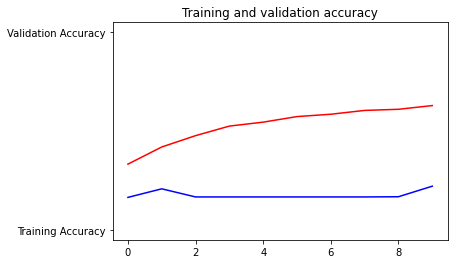

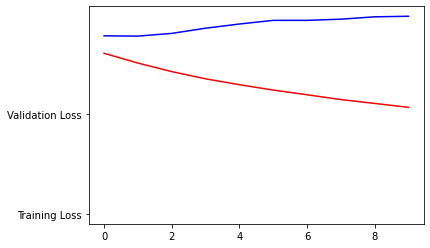

In [88]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [87]:
# animeFace_url = "/kaggle/input/test2/anya.jpg"
# animeFace_path = tf.keras.utils.get_file('anya-forger', origin=animeFace_url)

# img = tf.keras.utils.load_img(
#     animeFace_url, target_size=(img_height, img_width)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )